# Tripadvisor Rating Prediction

In [307]:
## Standard Purpose
import pandas as pd
import numpy as np
from collections import Counter

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
from gensim.summarization import keywords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import nltk
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

## Deeplearning/ML
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to /Users/anoya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/anoya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/anoya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anoya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Preprocessing

Firts we import the dataset

In [249]:
df = pd.read_csv("b.csv")
df.head()

,S.No.,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4* experience hotel monaco seat...,3
3,4,unique \tgreat stay \twonderful time hotel mon...,5
4,5,great stay great stay \twent seahawk game awes...,5


The dataset contains 3 columns, S.No (an ID), the Review and the Rating that the customer gave.

### Adding features

We can use VADER to generate more features in the dataset. This tool is capable of identifiying the sentiment of a text. So we can create ategories based on a scale to classify the reviews as neutral, positive or negative.

In [250]:
## Get sentiment
analyzer = SentimentIntensityAnalyzer()

def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

def get_sentiment(score):
    if score >= 0.5:
        return "Positive"
    elif score <= -0.5:
        return "Negative"
    else:
        return "Neutral"

Apply the functions to generate two new columns. One for the numeric score and other for the category we assign.

In [251]:
df["Sentiment_Score"] = df["Review"].astype("str").apply(compound_score)
df["Sentiment"] = df["Sentiment_Score"].apply(get_sentiment)

### Check Missing Values

No missing data

In [252]:
df.isna().sum()

S.No.              0
Review             0
Rating             0
Sentiment_Score    0
Sentiment          0
dtype: int64

### Distribution

We see that our dataset is not balanced, as we have mor the positive cases than negative and neutral together.

In [253]:
df.Sentiment.value_counts()

Sentiment
Positive    18320
Negative     1093
Neutral      1077
Name: count, dtype: int64

/var/folders/ts/7ztr_k8d2xq85mf55mh3hk9w0000gn/T/ipykernel_19794/3003983532.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Sentiment', ylabel='count'>

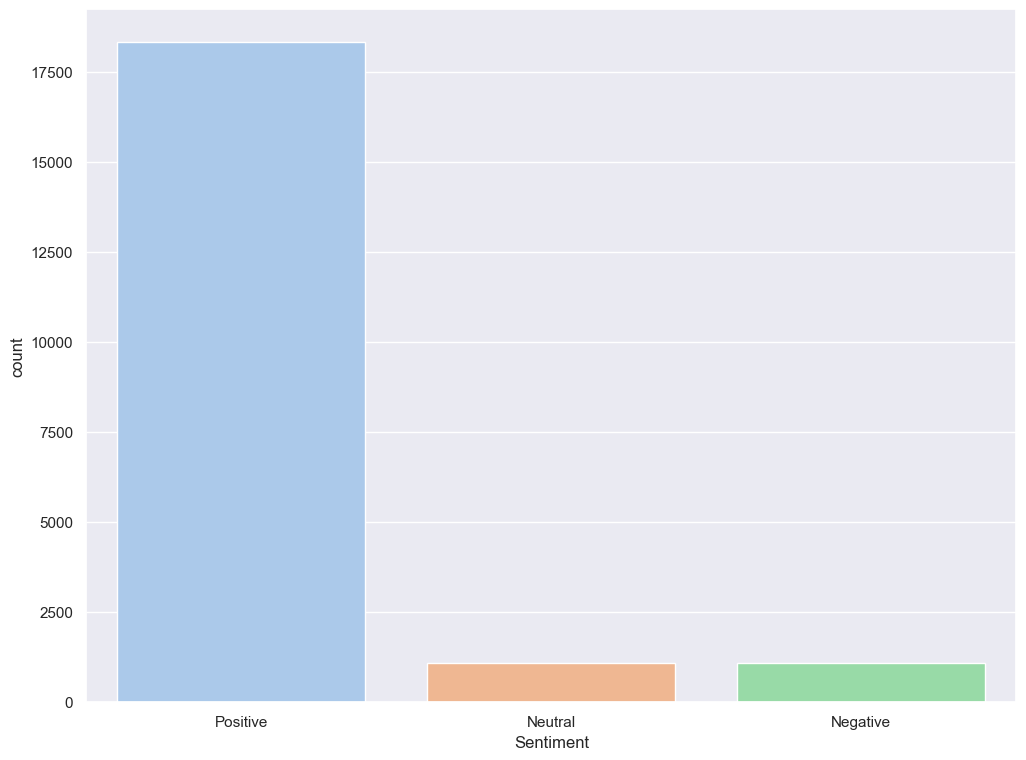

In [254]:
sns.countplot(data=df, x="Sentiment", palette="pastel")

## Visualization

### Bar Graph

In [255]:
# Preparing data for visualization 
Viz_1 = df[['Rating','Sentiment']].value_counts().rename_axis(['Rating','Sentiment']).reset_index(name='counts')
print(Viz_1)
# Plotting the Bar Graph 
fig = px.bar(x=Viz_1.Rating, y=Viz_1.counts, color=Viz_1.Sentiment,color_discrete_sequence=px.colors.qualitative.Pastel,title="Sentiment & Ratings",labels={'x':'Ratings','y':'Total Number'})
fig.show()

    Rating Sentiment  counts
0        5  Positive    8970
1        4  Positive    5916
2        3  Positive    1895
3        2  Positive    1119
4        1  Negative     666
5        1  Positive     420
6        2   Neutral     355
7        1   Neutral     335
8        2  Negative     319
9        3   Neutral     212
10       4   Neutral     103
11       3  Negative      76
12       5   Neutral      72
13       4  Negative      20
14       5  Negative      12


### Pie Chart

In [256]:
Viz_2 = df['Rating'].value_counts().rename_axis(['Rating']).reset_index(name='counts')
print(Viz_2)
fig_pie = px.pie(values=Viz_2.counts, names=Viz_2.Rating, title='Rating Distribution of the data', color_discrete_sequence=px.colors.qualitative.Pastel)
fig_pie.show()

   Rating  counts
0       5    9054
1       4    6039
2       3    2183
3       2    1793
4       1    1421


### Joint plot of the basis of Rating and Sentiment Score 

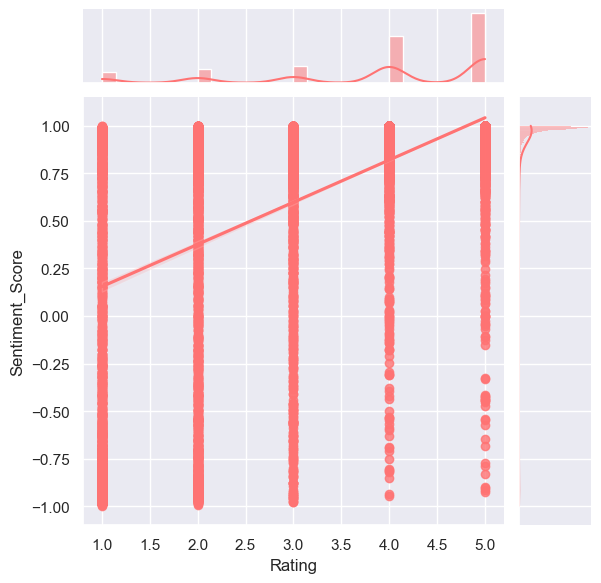

In [257]:
jp = sns.jointplot(data = df, x = 'Rating', y = 'Sentiment_Score', kind = "reg", color = '#ff7373')

### Violin Plot

In [258]:
fig = go.Figure()

Ratings = [1,2,3,4,5]

for rating in Ratings:
    fig.add_trace(go.Violin(x=df['Rating'][df['Rating'] == rating],
                            y=df['Sentiment_Score'][df['Rating'] == rating],
                            name=rating,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(
    title="Violin plot of Rating and Sentiment Score with box plot",
    xaxis_title="Rating",
    yaxis_title="Sentiment Score",
    font=dict(
        family="Courier New, monospace",
        size=12,
        
    )
)
fig.show()

### Worcloud for different sentiments

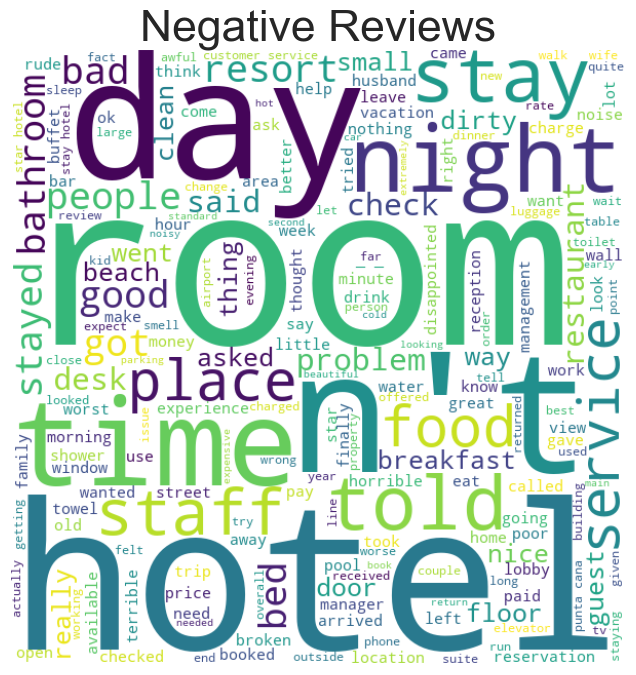

In [259]:
text1 = ''
for i in df[df['Sentiment']==str('Negative')]['Review'].values:
    text1 += i + ''
wc = WordCloud(width = 600, height = 600,background_color="white",min_font_size = 10,\
    repeat=True,)
wc.generate(text1)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title('Negative Reviews',fontsize=32);

### Wordcloud of all 3 sentiments

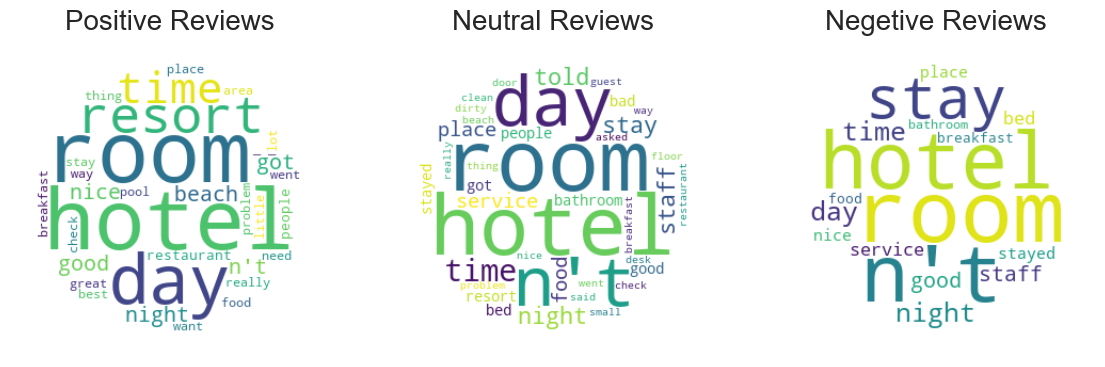

In [260]:
# Getting all the reviews termed positive in a single string and forming a word cloud of the string
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[14, 14], facecolor = None)

text1 =''
for i in df[df['Sentiment']=='Positive']['Review'].values:
    text1+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc1 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(text1)

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title('Positive Reviews',fontsize=20);

text2 =''
for i in df[df['Sentiment']=='Negative']['Review'].values:
    text2+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc2 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(text2)

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('Neutral Reviews',fontsize=20);

text3 =''
for i in df[df['Sentiment']=='Neutral']['Review'].values:
    text3+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc3 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(text3)

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title('Negetive Reviews',fontsize=20);

plt.show()

### Wordcloud of all 5 ratings

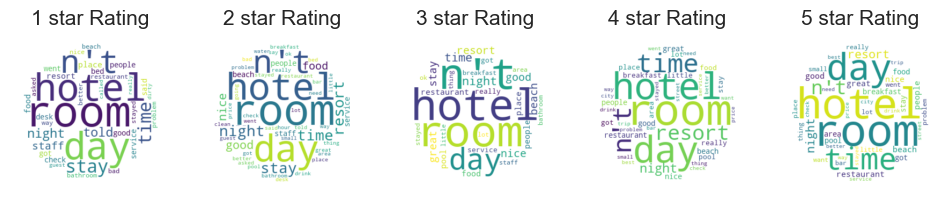

In [261]:
# Getting all the reviews termed positive in a single string and forming a word cloud of the string
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=[12, 12], facecolor = None)

text1 =''
for i in df[df['Rating']==1]['Review'].values:
    text1+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc1 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(text1)

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title('1 star Rating',fontsize=15);

text2 =''
for i in df[df['Rating']==2]['Review'].values:
    text2+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc2 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(text2)

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('2 star Rating',fontsize=15);

text3 =''
for i in df[df['Rating']==3]['Review'].values:
    text3+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc3 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(text3)

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title('3 star Rating',fontsize=15);

text4 =''
for i in df[df['Rating']==4]['Review'].values:
    text4+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc4 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc4.generate(text4)

ax4.axis("off")
ax4.imshow(wc4, interpolation="bilinear")
ax4.set_title('4 star Rating',fontsize=15);

text5 =''
for i in df[df['Rating']==5]['Review'].values:
    text5+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc5 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc5.generate(text4)

ax5.axis("off")
ax5.imshow(wc5, interpolation="bilinear")
ax5.set_title('5 star Rating',fontsize=15);

plt.show()

## Keywords

We prepare the new column of the data frame to extract the keywords of the reviews so we can usen them in our predictive model.

In [262]:
df["keywords"] = df["Review"].apply(keywords)

In [263]:
df["keywords"] = df["keywords"].apply(lambda x: x.split('\n'))

In [264]:
keywords = [keyword for sublist in df["keywords"] for keyword in sublist if keyword]

In [265]:
keywords_counter = Counter(keywords)
keywords_df = pd.DataFrame(keywords_counter.items(), columns=['Keyword', 'Frequency'])
keywords_df = keywords_df.sort_values(by='Frequency', ascending=False)


In [266]:
print(keywords_df.head())

    Keyword  Frequency
46    hotel       7510
4      room       7491
1      stay       4423
107   rooms       4348
72    great       2809


/var/folders/ts/7ztr_k8d2xq85mf55mh3hk9w0000gn/T/ipykernel_19794/4029681467.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




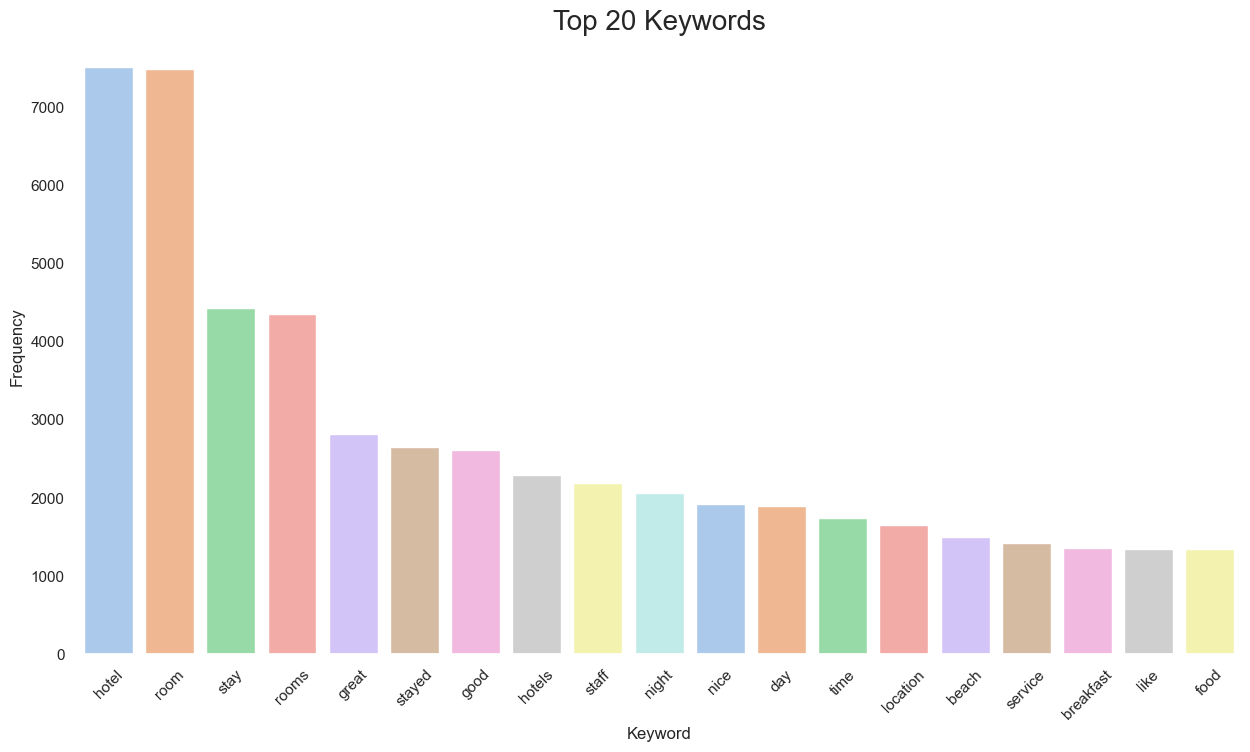

In [267]:
sns.set(rc={'figure.figsize':(15,8)})
fig, ax = plt.subplots()

ax = sns.barplot(data=keywords_df[0:19],x="Keyword",y="Frequency",palette="pastel")
ax.patch.set_visible(False)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_title("Top 20 Keywords",fontsize=20);

We can delete the 4 principal keywords as they don't give us any information because they are general words.

In [268]:
top4 = ["hotel","room","stay","rooms"]
for x in top4:
    df["Review"] = df["Review"].astype(str).str.replace(x,"")

In [269]:
df.head(2)

,S.No.,Review,Rating,Sentiment_Score,Sentiment,keywords
0,1,nice expensive parking got good deal annive...,4,0.9626,Positive,"[parking, stay, staying, nice hotel, room, tal..."
1,2,ok nothing special charge diamond member hilto...,2,0.9870,Positive,"[hotels, hotel room, suite, suites, suits, arr..."


### Stopwords

Now we tokenize the reviews and delete the stop words from that phrases.

In [270]:
data2=df.copy()
      
def removing_stop_words(txt):
    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(txt) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
     
    return filtered_sentence

In [271]:
data2["Review"] = data2["Review"].apply(removing_stop_words)

### Text Lematizer

The next step is to lematize the words in the reviews. This is useful to elminate verb tenses for example.

In [272]:
lemmatizer = WordNetLemmatizer() 

In [273]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  

def lemmatize(word_list):
    lema_data = []
    tagged_tokens = nltk.pos_tag(word_list)  
    
    for word, tag in tagged_tokens:
        pos = get_wordnet_pos(tag)  
        lema_data.append(lemmatizer.lemmatize(word, pos=pos))
        
    return " ".join(lema_data)  

In [274]:
data2["Review"] = data2["Review"].apply(lemmatize)

### Tokenizer

In [275]:
X = data2["Review"].values

In [276]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

### Texts to sequence

Now we convert the text to sequences or numbers so the ML model can understand the text.

In [285]:
sequences = tokenizer.texts_to_sequences(data2["Review"].values) 
X = pad_sequences(sequences, padding='post', maxlen=800)

In [294]:
max_length = max([len(x) for x in X])
vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("Max length of sentence: {}".format(max_length))

Vocabulary size: 47647
Max length of sentence: 800


In [302]:
labels = ['1', '2', '3', '4', '5']
          
y = df['Rating']
y = y.map({1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           })

/var/folders/ts/7ztr_k8d2xq85mf55mh3hk9w0000gn/T/ipykernel_19794/2506204010.py:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



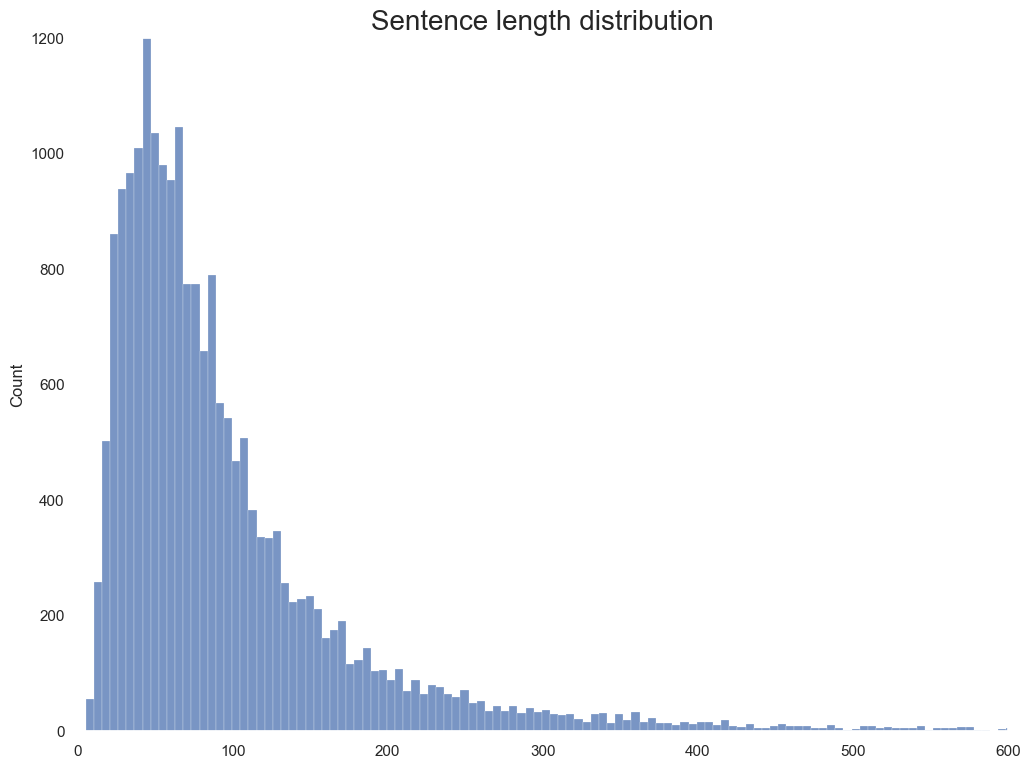

In [295]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12,9)})
length_dist = [len(seq) for seq in sequences]
sns.histplot(length_dist,palette="pastel")
ax.patch.set_visible(False)
ax.set_xlim(0,600)
ax.set_ylim(0,1200)
ax.set_title("Sentence length distribution",fontsize=20);
plt.show()

## Training

Separate Train and Test.

In [304]:
# First, we split the data into training and testing
X_train_test, X_test, Y_train_test, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We then split the training/test set to create a training set and a validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train_test, Y_train_test, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2


### RNN / LSTM

Create the Neural Network

In [305]:
model = tf.keras.Sequential([
    L.Embedding(vocab_size, 76, input_shape=(800,)),
    L.Bidirectional(L.LSTM(76,return_sequences=True)),
    L.Conv1D(64,3),
    L.MaxPool1D(),
    L.Flatten(),
    L.Dropout(0.2),
    L.Dense(128, activation="relu"),
    L.Dropout(0.2),
    L.Dense(64, activation="relu"),
    L.Dropout(0.2),
     L.Dense(32, activation="relu"),
    L.Dropout(0.2),
    L.Dense(5, activation="softmax")
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/Users/anoya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:81: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [306]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_24 (Embedding)        │ (None, 800, 76)        │     3,621,172 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ (None, 800, 152)       │        93,024 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 798, 64)        │        29,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 399, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 25536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 25536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │     3,268,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,022,681 (26.79 MB)

 Trainable params: 7,022,681 (26.79 MB)

 Non-trainable params: 0 (0.00 B)

Create an early stop and train the model. I only train 4 spochs because I saw that from there on the vaccuracy of the validation would drop.

In [308]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(X_train, Y_train, epochs=4, validation_data=(X_val, Y_val), batch_size=150, callbacks=[early_stop], verbose=1)

Epoch 1/4
82/82 ━━━━━━━━━━━━━━━━━━━━ 224s 3s/step - accuracy: 0.3593 - loss: 1.4873 - val_accuracy: 0.5149 - val_loss: 1.1149
Epoch 2/4
82/82 ━━━━━━━━━━━━━━━━━━━━ 229s 3s/step - accuracy: 0.5017 - loss: 1.0716 - val_accuracy: 0.5268 - val_loss: 1.0006
Epoch 3/4
82/82 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.5802 - loss: 0.8931 - val_accuracy: 0.5569 - val_loss: 0.9659
Epoch 4/4
82/82 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.6357 - loss: 0.8038 - val_accuracy: 0.5893 - val_loss: 0.9249


## Metrics

Represent accuracy and validation loss

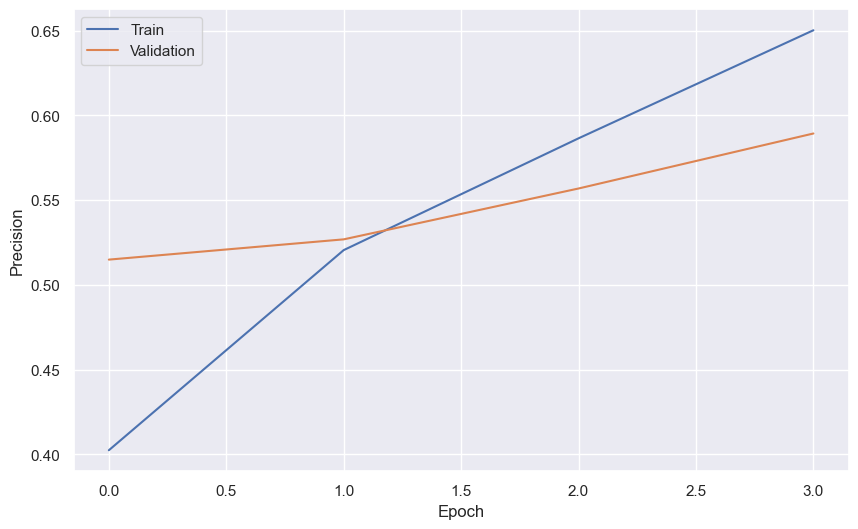

In [309]:
#(Accuracy)
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()

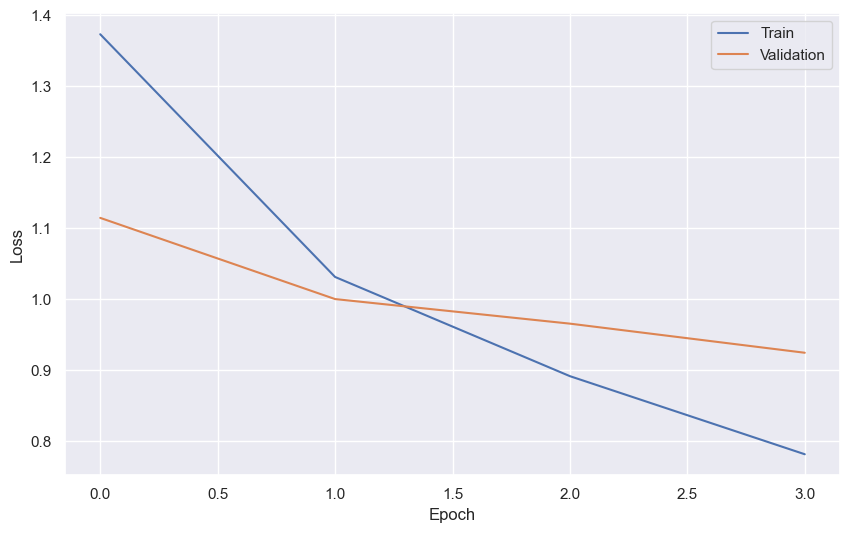

In [310]:
# Loss Fcuntion
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Prediction

Predict the test values and calculate its metrics

In [311]:
pred = model.predict(X_test)
pred_final = np.argmax(pred,axis=-1)

129/129 ━━━━━━━━━━━━━━━━━━━━ 17s 131ms/step


In [312]:
print('Accuracy: {}%'.format(round(accuracy_score(pred_final, Y_test)*100),2))

Accuracy: 60%


In [313]:
print("Root mean square error: {}".format(round(np.sqrt(mean_squared_error(pred_final,Y_test)),3)))

Root mean square error: 0.763


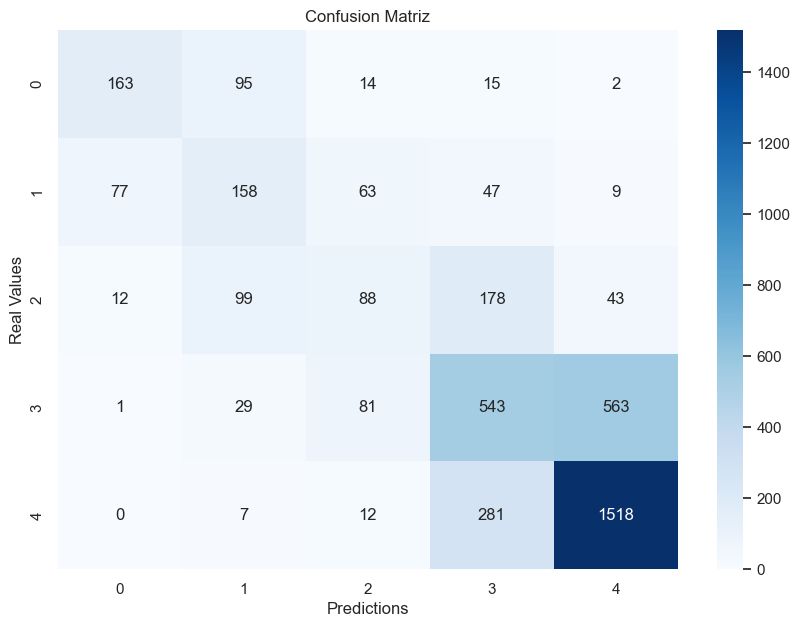

In [314]:
# Confusion Matrix
cm = confusion_matrix(Y_test, pred_final)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.title('Confusion Matriz')
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()

In [315]:
precision, recall, f1, support = precision_recall_fscore_support(Y_test, pred_final, average=None, labels=[0, 1, 2, 3, 4])

# Total Accuracy of the model
accuracy = accuracy_score(Y_test, pred_final)

# Calculate precision, recall and f1-score
mean_precision = precision.mean()
mean_recall = recall.mean()
mean_f1 = f1.mean()
mean_support = support.mean()

# Dataframe to show the results
results_df = pd.DataFrame({
    'Rating': [0, 1, 2, 3, 4, 'Mean'],
    'Precision': list(precision) + [mean_precision],
    'Recall': list(recall) + [mean_recall],
    'F1-Score': list(f1) + [mean_f1],
    'Support': list(support) + [mean_support],
    'Accuracy': [''] * 5 + [accuracy] 
})

print(results_df)

  Rating  Precision    Recall  F1-Score  Support  Accuracy
0      0   0.644269  0.564014  0.601476    289.0          
1      1   0.407216  0.446328  0.425876    354.0          
2      2   0.341085  0.209524  0.259587    420.0          
3      3   0.510338  0.446179  0.476107   1217.0          
4      4   0.711007  0.834983  0.768024   1818.0          
5   Mean   0.522783  0.500206  0.506214    819.6  0.602733


The imbalance of the classes may have caused the model to be poorly trained, as it is observed that the classes with ratings 4 and 5 have the highest number of occurrences compared to the others.